<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Smartwatch_Analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go 
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/dailyActivity_merged.csv') 
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
data.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [6]:
np.around(data.describe(),2)

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00
mean,4.855407e+09,7637.91,5.49,5.48,0.11,1.50,0.57,3.34,0.00,21.16,13.56,192.81,991.21,2303.61
std,2.424805e+09,5087.15,3.92,3.91,0.62,2.66,0.88,2.04,0.01,32.84,19.99,109.17,301.27,718.17
min,1.503960e+09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.320127e+09,3789.75,2.62,2.62,0.00,0.00,0.00,1.95,0.00,0.00,0.00,127.00,729.75,1828.50
50%,4.445115e+09,7405.50,5.24,5.24,0.00,0.21,0.24,3.36,0.00,4.00,6.00,199.00,1057.50,2134.00
75%,6.962181e+09,10727.00,7.71,7.71,0.00,2.05,0.80,4.78,0.00,32.00,19.00,264.00,1229.50,2793.25
max,8.877689e+09,36019.00,28.03,28.03,4.94,21.92,6.48,10.71,0.11,210.00,143.00,518.00,1440.00,4900.00


In [7]:
data['max'] = data.loc[:,'TotalSteps']>15000


In [8]:
data['max'].value_counts()

False    873
True      67
Name: max, dtype: int64

In [22]:
pivot  = pd.pivot_table(data, values = 'TotalSteps',index = 'max', aggfunc= 'count')
pivot

,TotalSteps
max,
False,873
True,67


In [26]:
df =data.loc[(data['VeryActiveMinutes'] > 100) & (data['TotalSteps'] >= 15000)]

In [31]:
df['TotalSteps'].sort_values(ascending=False)

50     36019
927    27745
780    22988
437    22770
779    22359
794    22026
771    20669
781    20500
770    20159
793    19769
773    18827
768    18060
438    17298
774    17076
579    15764
910    15337
827    15148
Name: TotalSteps, dtype: int64

Text(0.5, 1.0, 'Correlation')

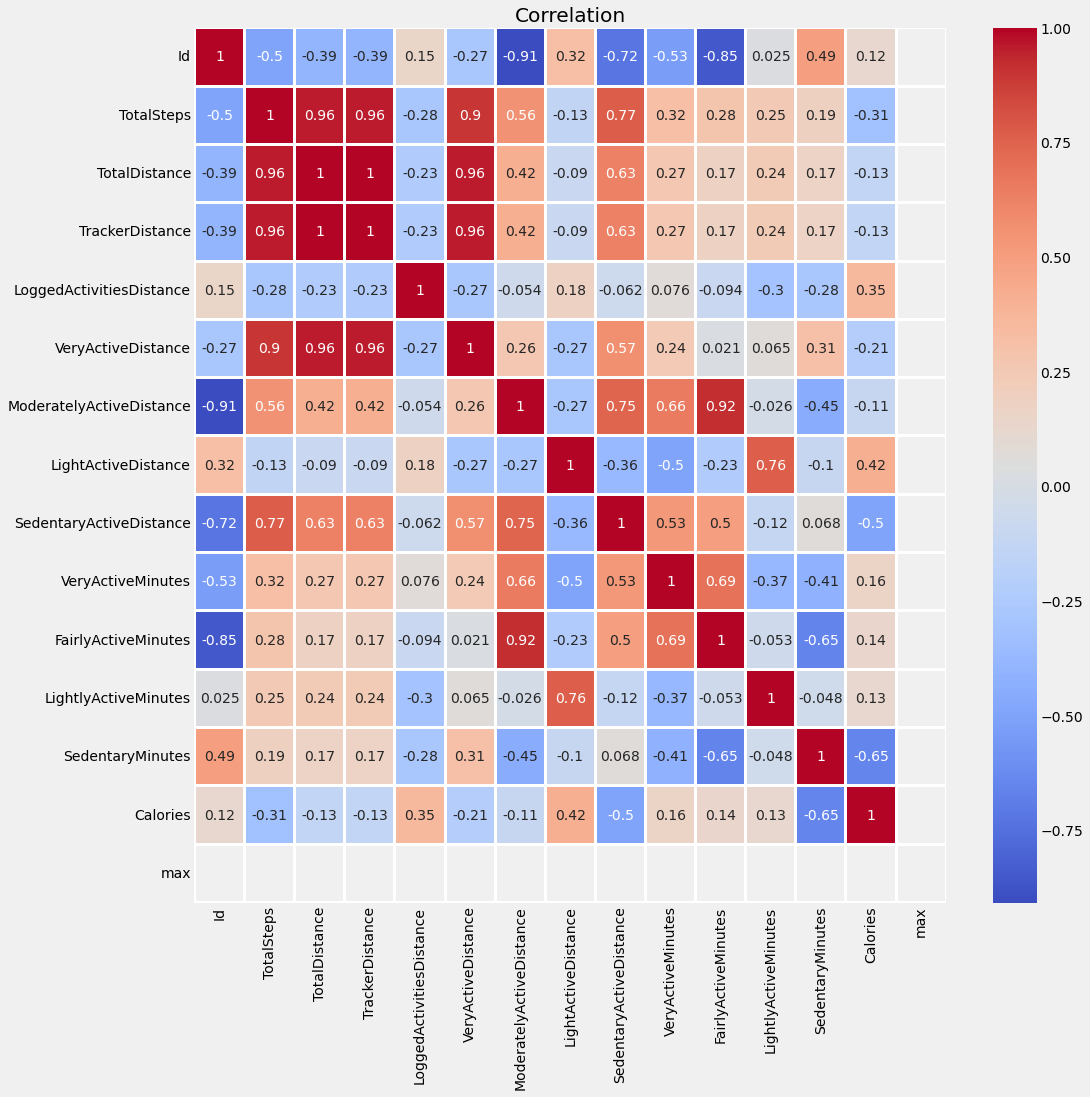

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), linewidths=2, linecolor='white', annot=True, cmap='coolwarm')
plt.title('Correlation')